## Final Project Submission

Please fill out:
* Student name: ISAAC KABARI WANG'ANG'A
* Student pace:  part time 
* Scheduled project review date/time: 19/07/2024
* Instructor name: SAMUEL G MWANGI, SAMUEL KARU AMD WINNIE ANYOSO
* Blog post URL:


IMPORTING LIBRARIES

In [105]:
#imports 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error

LOADING THE DATASET

In [106]:
df = pd.read_csv("./data/kc_house_data.csv")

VIEW FIRST FIVE ROWS OF THE DATASET

In [107]:
df.head()

id        date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  10/13/2014  221900.0         3       1.00         1180   
1  6414100192   12/9/2014  538000.0         3       2.25         2570   
2  5631500400   2/25/2015  180000.0         2       1.00          770   
3  2487200875   12/9/2014  604000.0         4       3.00         1960   
4  1954400510   2/18/2015  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0      5650     1.0         NaN   0.0  ...      7        1180            0.0   
1      7242     2.0         0.0   0.0  ...      7        2170          400.0   
2     10000     1.0         0.0   0.0  ...      6         770            0.0   
3      5000     1.0         0.0   0.0  ...      7        1050          910.0   
4      8080     1.0         0.0   0.0  ...      8        1680            0.0   

  yr_built  yr_renovated  zipcode      lat     long  sqft_living15  sqft_lot15  
0     1955           0.0    98178  47.5112 -122.257           1340        5650  
1     1951        1991.0    98125  47.7210 -122.319           1690        7639  
2     1933           NaN    98028  47.7379 -122.233           2720        8062  
3     1965           0.0    98136  47.5208 -122.393           1360        5000  
4     1987           0.0    98074  47.6168 -122.045           1800        7503  

[5 rows x 21 columns]

In [108]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

HOUSING DATA COLUMN DESCRIPTIONS

1. **ID** : a variable that identifies each household in the dataset
2. **Date**: the specific date used as a reference point, it is not quite clear what this date refers to in this dataset.
3. **Price**: This could be the transaction cost at which the house is being sold
4. **bedrooms**: this column shows number of bedrooms in the house
5. **Bathrooms**: this column shows number of bathrooms in the house
6. **sqft_Living**:  the total area within the interior of the home that is used for living purposes.
7. **sqft_lot**: the total area of the land on which the house is built.
8. **Floors**: represents the number of stories or levels in a house. 
9. **Waterfront**: possibility of whether the property is located directly on the waterfront or not.
10. **View**: refers to the quality or type of view that a property has access to.
11. **Condition**: refers to the overall state and how well-maintained the property is.
12. **grade**: measure of the overall construction quality and design of a property
13. **sqft_abve**: total square footage of the part of the home that is above ground level.
14. **sqft_basement**: ypically stands for the total square footage of the basement area of a property. 
15. **yr_built**: the year in which the property was constructed. 
16. **yr_renovated**: the year in which the property was upgraded or repaired and renovated.
17. **zipcode**:represents the postal code or ZIP code associated with a specific property. 
18. **lat**: represents the Geographical  latitude of a property's location. 
19. **long**: represents the Geographical longitude of a property's location. 
20. **sqft_living15**: represents the square footage of the living area of a property.
21. s**qft_lot15**: represents the square footage of the lot or land area associated with a property




**EXPLORATY DATA ANALYSIS**

View number of rows and columns

In [109]:
df.shape

(21597, 21)

There are 21597 rows and 21 Columns in the Dataset

In [110]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [111]:
df.describe()

id         price      bedrooms     bathrooms   sqft_living  \
count  2.159700e+04  2.159700e+04  21597.000000  21597.000000  21597.000000   
mean   4.580474e+09  5.402966e+05      3.373200      2.115826   2080.321850   
std    2.876736e+09  3.673681e+05      0.926299      0.768984    918.106125   
min    1.000102e+06  7.800000e+04      1.000000      0.500000    370.000000   
25%    2.123049e+09  3.220000e+05      3.000000      1.750000   1430.000000   
50%    3.904930e+09  4.500000e+05      3.000000      2.250000   1910.000000   
75%    7.308900e+09  6.450000e+05      4.000000      2.500000   2550.000000   
max    9.900000e+09  7.700000e+06     33.000000      8.000000  13540.000000   

           sqft_lot        floors    waterfront          view     condition  \
count  2.159700e+04  21597.000000  19221.000000  21534.000000  21597.000000   
mean   1.509941e+04      1.494096      0.007596      0.233863      3.409825   
std    4.141264e+04      0.539683      0.086825      0.765686      0.650546   
min    5.200000e+02      1.000000      0.000000      0.000000      1.000000   
25%    5.040000e+03      1.000000      0.000000      0.000000      3.000000   
50%    7.618000e+03      1.500000      0.000000      0.000000      3.000000   
75%    1.068500e+04      2.000000      0.000000      0.000000      4.000000   
max    1.651359e+06      3.500000      1.000000      4.000000      5.000000   

              grade    sqft_above      yr_built  yr_renovated       zipcode  \
count  21597.000000  21597.000000  21597.000000  17755.000000  21597.000000   
mean       7.657915   1788.596842   1970.999676     83.636778  98077.951845   
std        1.173200    827.759761     29.375234    399.946414     53.513072   
min        3.000000    370.000000   1900.000000      0.000000  98001.000000   
25%        7.000000   1190.000000   1951.000000      0.000000  98033.000000   
50%        7.000000   1560.000000   1975.000000      0.000000  98065.000000   
75%        8.000000   2210.000000   1997.000000      0.000000  98118.000000   
max       13.000000   9410.000000   2015.000000   2015.000000  98199.000000   

                lat          long  sqft_living15     sqft_lot15  
count  21597.000000  21597.000000   21597.000000   21597.000000  
mean      47.560093   -122.213982    1986.620318   12758.283512  
std        0.138552      0.140724     685.230472   27274.441950  
min       47.155900   -122.519000     399.000000     651.000000  
25%       47.471100   -122.328000    1490.000000    5100.000000  
50%       47.571800   -122.231000    1840.000000    7620.000000  
75%       47.678000   -122.125000    2360.000000   10083.000000  
max       47.777600   -121.315000    6210.000000  871200.000000

**SELECT COLUMNS WITH NUMERICAL DATA**

In [112]:
df = df.select_dtypes(include=[np.number])

In [113]:
df.columns

Index(['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15',
       'sqft_lot15'],
      dtype='object')

**CHECKING FOR NULL VALUES**

In [114]:
df.isna().sum()

id                  0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

From the Output there are 2376, 63 and 3842 null values in thewaterfront, view and  yr_renovated columns respectively.

In [115]:
df = df.fillna(df.mean())

In [116]:
df.shape

(21597, 19)

Check for Duplicates

In [117]:
duplicates = df.duplicated().sum()
print(duplicates)

2


Output indicates that there are Two Duplicates

**Remove Duplicates**

In [118]:
df=df.drop_duplicates()

In [119]:
duplicates = df.duplicated().sum()# Confirm if duplicates have been dropped
print(duplicates)

0


**Recheck for Missing Values**

In [120]:
df.isna().sum()

id               0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

Replacing Inf with Nan Values

In [121]:
df = pd.DataFrame(df)

In [122]:
df.replace([np.inf, -np.inf], np.nan, inplace=True)

In [123]:
df= df.select_dtypes(include=[np.number])
print (df.dtypes)

id                 int64
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront       float64
view             float64
condition          int64
grade              int64
sqft_above         int64
yr_built           int64
yr_renovated     float64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object


In [124]:
df.isna().sum()

id               0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [125]:
df = df.fillna(df.mean())

**DATA VISUALIZATION**

c:\Users\PC\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\PC\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\PC\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\PC\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

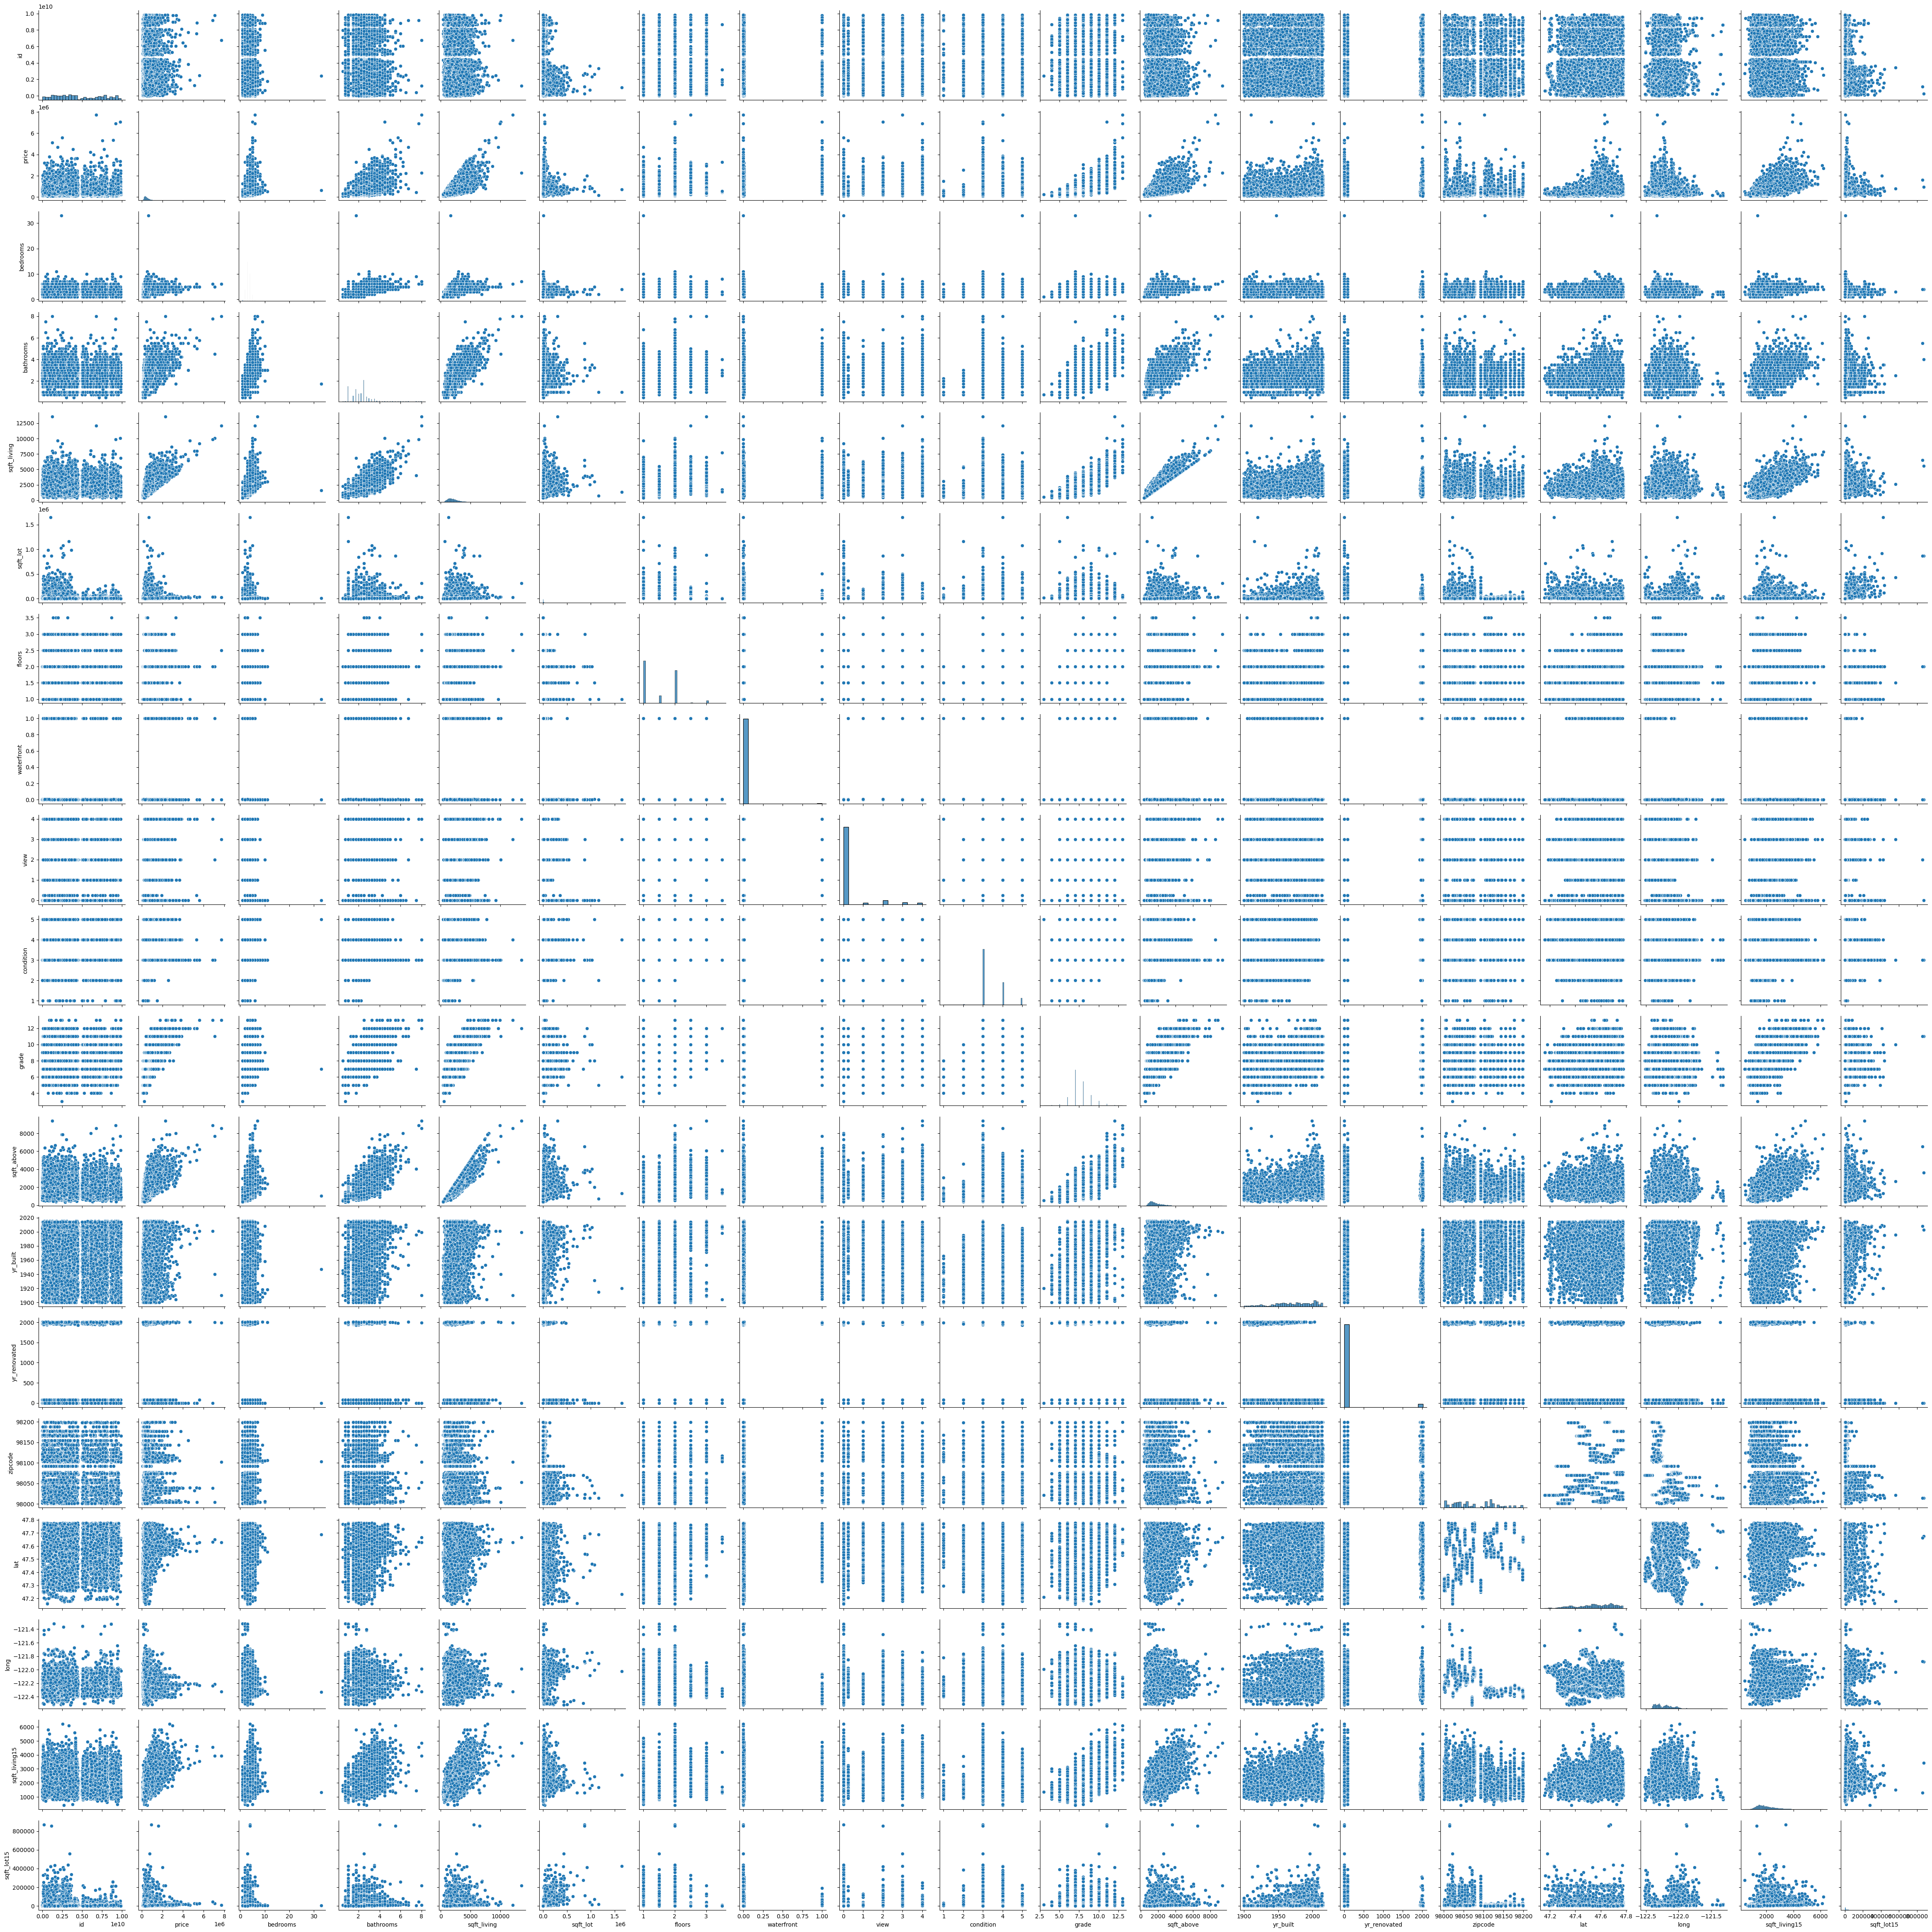

In [126]:
sns.pairplot(df)
plt.show()

Drop Irrelevant columns

In [127]:
df=df.drop(columns=['id','sqft_above', 'yr_renovated', 'lat', 'long'])

Check for current columns after Dropping Irevelant columns

In [128]:
df.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'yr_built', 'zipcode',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

Select  Numeric Columns

In [129]:
df= df.select_dtypes(include=[float, int])

In [130]:
df.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'yr_built', 'zipcode',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [131]:
df.corr()

price  bedrooms  bathrooms  sqft_living  sqft_lot    floors  \
price          1.000000  0.308793   0.525908     0.701918  0.089878  0.256807   
bedrooms       0.308793  1.000000   0.514536     0.578219  0.032462  0.177987   
bathrooms      0.525908  0.514536   1.000000     0.755766  0.088386  0.502565   
sqft_living    0.701918  0.578219   0.755766     1.000000  0.173454  0.353965   
sqft_lot       0.089878  0.032462   0.088386     0.173454  1.000000 -0.004792   
floors         0.256807  0.177987   0.502565     0.353965 -0.004792  1.000000   
waterfront     0.264117 -0.002260   0.063527     0.104493  0.021517  0.020671   
view           0.393753  0.078408   0.186104     0.281920  0.075123  0.028429   
condition      0.036062  0.026473  -0.126454    -0.059444 -0.008845 -0.264036   
grade          0.667966  0.356604   0.665834     0.762795  0.114752  0.458766   
yr_built       0.053949  0.155724   0.507157     0.318171  0.052978  0.489143   
zipcode       -0.053396 -0.154146  -0.204749    -0.199807 -0.129622 -0.059447   
sqft_living15  0.585242  0.393417   0.569887     0.756401  0.144767  0.280102   
sqft_lot15     0.082847  0.030680   0.088316     0.184343  0.718202 -0.010699   

               waterfront      view  condition     grade  yr_built   zipcode  \
price            0.264117  0.393753   0.036062  0.667966  0.053949 -0.053396   
bedrooms        -0.002260  0.078408   0.026473  0.356604  0.155724 -0.154146   
bathrooms        0.063527  0.186104  -0.126454  0.665834  0.507157 -0.204749   
sqft_living      0.104493  0.281920  -0.059444  0.762795  0.318171 -0.199807   
sqft_lot         0.021517  0.075123  -0.008845  0.114752  0.052978 -0.129622   
floors           0.020671  0.028429  -0.264036  0.458766  0.489143 -0.059447   
waterfront       1.000000  0.381156   0.016631  0.082642 -0.024602  0.029260   
view             0.381156  1.000000   0.045659  0.249273 -0.054457  0.085115   
condition        0.016631  0.045659   1.000000 -0.146861 -0.361553  0.002821   
grade            0.082642  0.249273  -0.146861  1.000000  0.447836 -0.185705   
yr_built        -0.024602 -0.054457  -0.361553  0.447836  1.000000 -0.347133   
zipcode          0.029260  0.085115   0.002821 -0.185705 -0.347133  1.000000   
sqft_living15    0.083769  0.279115  -0.093066  0.713872  0.326388 -0.279297   
sqft_lot15       0.030523  0.073167  -0.003142  0.120999  0.070812 -0.147330   

               sqft_living15  sqft_lot15  
price               0.585242    0.082847  
bedrooms            0.393417    0.030680  
bathrooms           0.569887    0.088316  
sqft_living         0.756401    0.184343  
sqft_lot            0.144767    0.718202  
floors              0.280102   -0.010699  
waterfront          0.083769    0.030523  
view                0.279115    0.073167  
condition          -0.093066   -0.003142  
grade               0.713872    0.120999  
yr_built            0.326388    0.070812  
zipcode            -0.279297   -0.147330  
sqft_living15       1.000000    0.183518  
sqft_lot15          0.183518    1.000000

In [132]:
zero_variance_columns = df.var() == 0
print(zero_variance_columns[zero_variance_columns].index.tolist())

[]


**COORELATION HEATMAP**

<Axes: >

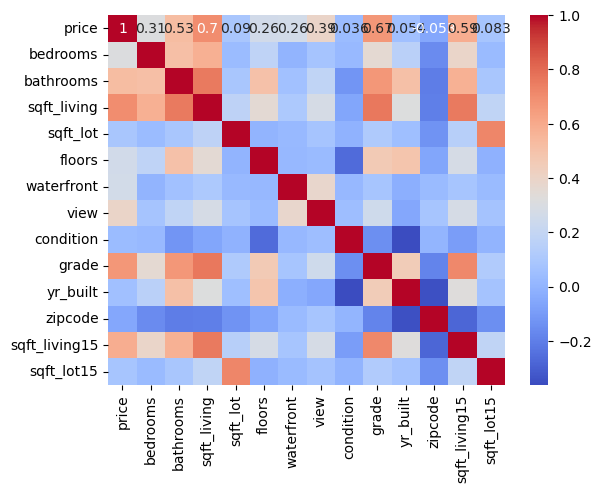

In [133]:
sns.heatmap(df.corr(),cmap="coolwarm",annot=True)

**FEATURE SELECTION**

In [134]:
df = df[['price','sqft_living','bathrooms','grade']]

c:\Users\PC\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\PC\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\PC\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\PC\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

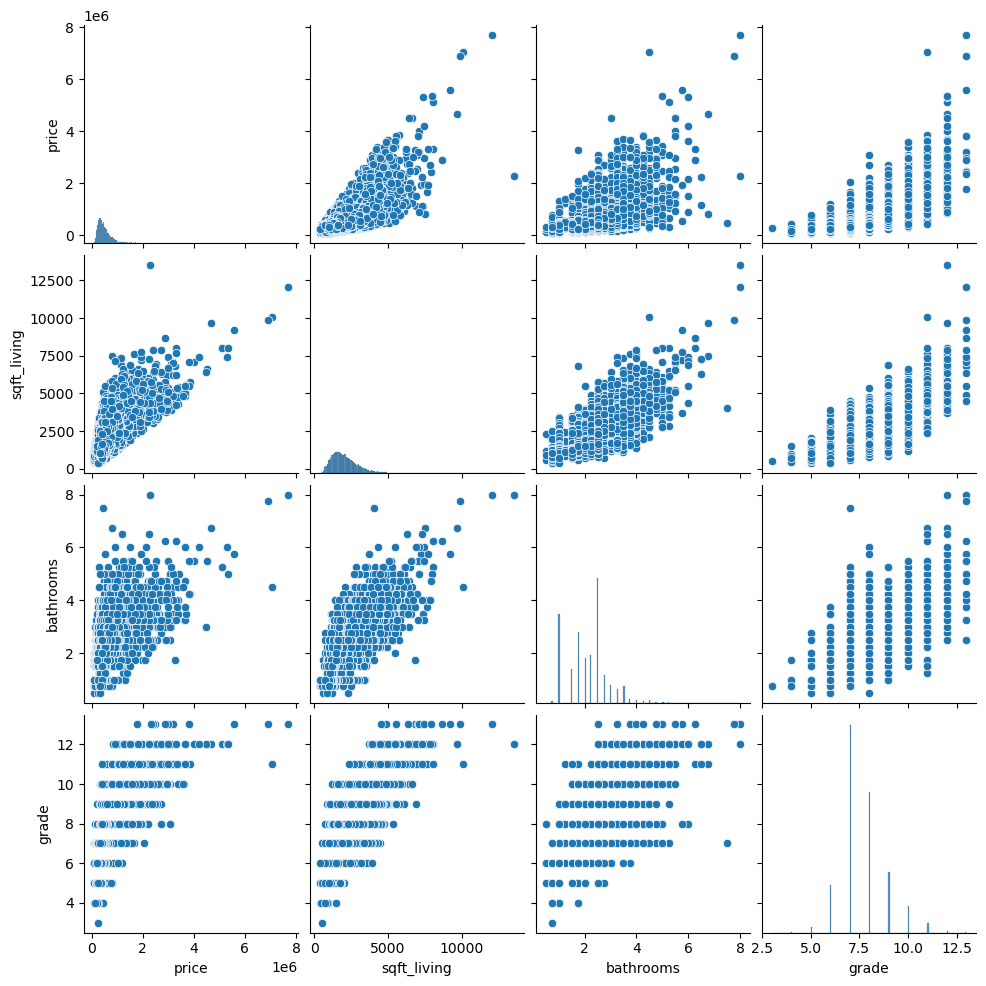

In [135]:
sns.pairplot(data=df)

In [136]:
df.head()

price  sqft_living  bathrooms  grade
0  221900.0         1180       1.00      7
1  538000.0         2570       2.25      7
2  180000.0          770       1.00      6
3  604000.0         1960       3.00      7
4  510000.0         1680       2.00      8

**CHECK FOR OUTLIERS**

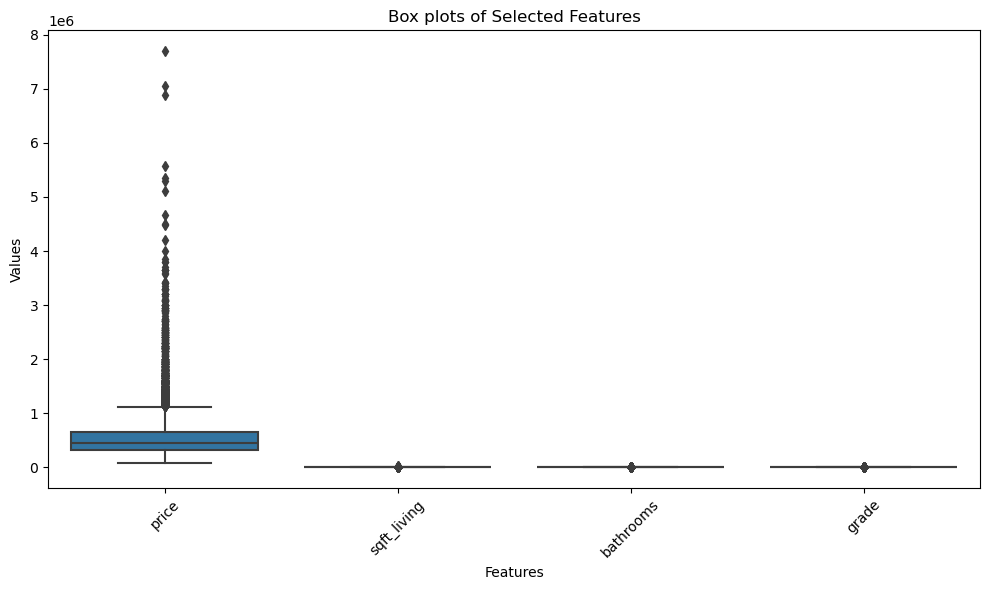

In [137]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df)
plt.title('Box plots of Selected Features')
plt.xlabel('Features')
plt.ylabel('Values')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

From the Visualzation its seems outliers are present in every Feature

**GET THE OUTLIERS**

In [138]:
# Calculate IQR for selected columns
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

# Define outlier boundaries
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Find outliers
outliers = ((df < lower_bound) | (df > upper_bound)).any(axis=1)

# Print indices of outliers
outlier_indices = df.index[outliers]
outlier_indices

Index([    5,    21,    36,    49,    66,    69,    70,    75,    79,    91,
       ...
       21535, 21545, 21546, 21552, 21557, 21560, 21574, 21577, 21581, 21584],
      dtype='int64', length=2547)

**REMOVE OUTLIERS**

In [139]:
df= df.drop(outlier_indices )

**DATA VISUALIZATION**

1.**Show scatter plot to show relationship between price vs square foot area used  of the  living purposes 'sqft_living'**

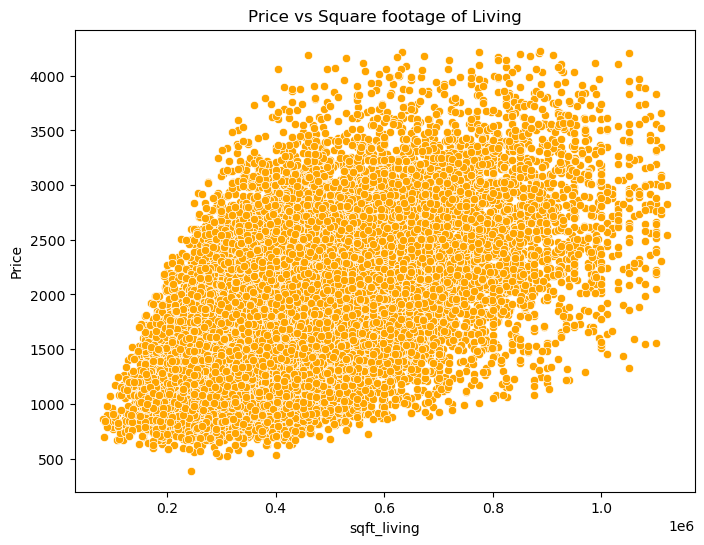

In [140]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='price', y='sqft_living', color='orange', data=df)
plt.title('Price vs Square footage of Living')
plt.xlabel('sqft_living')
plt.ylabel('Price')
plt.show()

**Observation**

From the Scatter plot we observe that the price and square foot living area have a strong co-orelation with a  positive trend . As the Squae foot living area increases the price of also increases.

This implies that houses with larger square foot living areas, command higher prices

2. **Show scatter plot to show relationship between price vs grade**

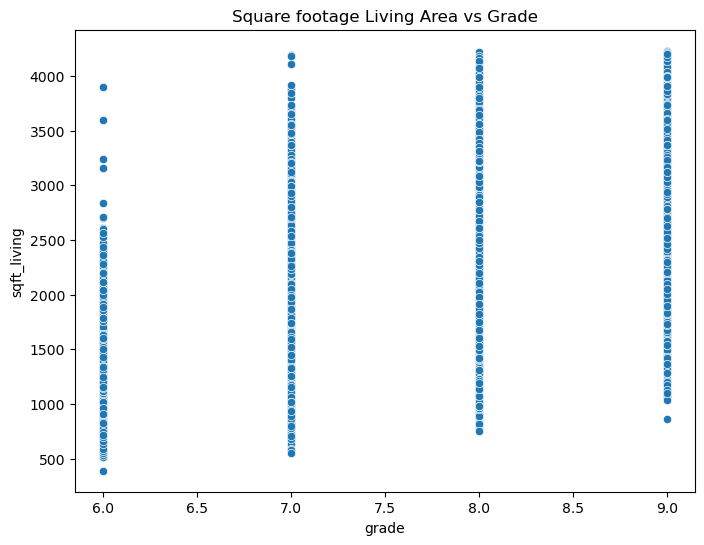

In [141]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='grade', y='sqft_living', data=df)
plt.title('Square footage Living Area vs Grade')
plt.xlabel('grade')
plt.ylabel('sqft_living')
plt.show()

**Observation**

From the scatterplot above, we observe that there is no obvious or upward downward trend across the different Price levels. Instead, the points are evenly distributed horizontally within each Price level.

This may imply that price and Grade  may not have a direct linear relationship. Instead, the grades are distributed similarly across each price level.

3. **Show scatter plot to show relationship between price vs square footage of lot area**

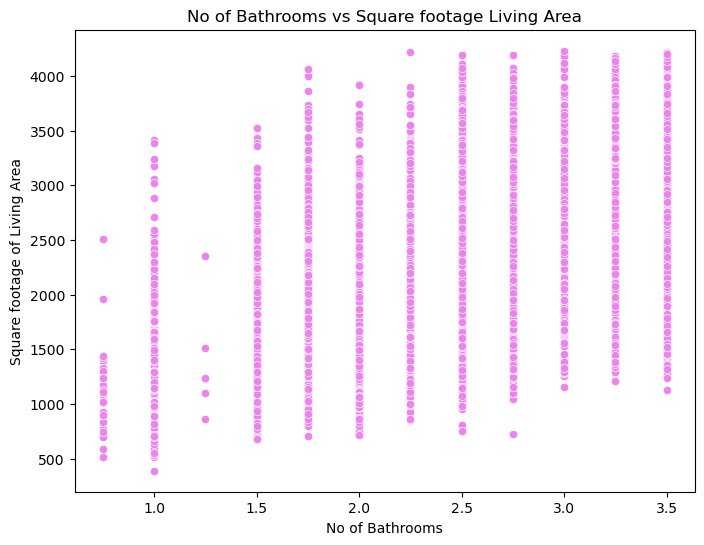

In [142]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='bathrooms', y= 'sqft_living', color= 'violet',data=df)
plt.title('No of Bathrooms vs Square footage Living Area')
plt.xlabel('No of Bathrooms')
plt.ylabel('Square footage of Living Area')
plt.show()

**Observation**

There is a strong coorelation between Price and Square footage of Lot area, The points appear to be uniformly distributed, which implies that the grade does not have a strong linear relationship with price in this dataset.

4. **Show scatter plot to show relationship between price vs square footage of the lot or land area associated with a property**

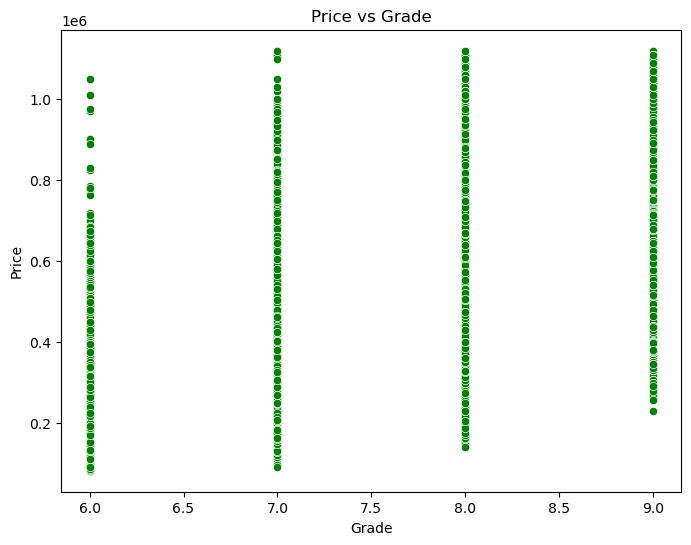

In [143]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='grade', y='price', color= 'green',data=df)
plt.title('Price vs Grade')
plt.xlabel('Grade')
plt.ylabel('Price')
plt.show()

**Observation**

There is a strong coorelation between Price and Square footage of Lot and Land area, The points appear to be uniformly distributed, which implies that the grade does not have a strong linear relationship with price in this dataset.

**COORELATION HEAT MAP FOR SELECTED FEATURES**

In [144]:
df.corr()

price  sqft_living  bathrooms     grade
price        1.000000     0.550281   0.380415  0.549427
sqft_living  0.550281     1.000000   0.679304  0.634154
bathrooms    0.380415     0.679304   1.000000  0.586178
grade        0.549427     0.634154   0.586178  1.000000

<Axes: >

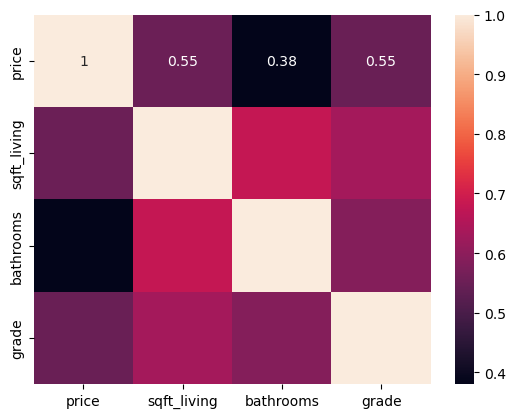

In [145]:
sns.heatmap(data=df.corr(),annot=True)

**DATA PREPARATION**

In [146]:
X = df[['sqft_living', 'bathrooms', 'grade']]
y = df['price']


**TEST TRAIN SPLIT**

In [147]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**SCALING THE DATA**

In [148]:
scaler = StandardScaler()

In [149]:
X_train_scaled = scaler.fit_transform(X_train)

In [150]:
X_test_scaled = scaler.transform(X_test)

**MODELLING**

In [151]:
model = LinearRegression()

In [152]:
model.fit(X_train_scaled, y_train)#Training Model

LinearRegression()

In [155]:
X_train_scaled.shape, y_train.shape, X_test_scaled.shape, y_test.shape

((15238, 3), (15238,), (3810, 3), (3810,))

In [156]:
y_pred = model.predict(X_test_scaled)

In [157]:
df = pd.DataFrame({"true":y_test,"pred":y_pred})
df.head()

true           pred
12779  495000.0  514092.746766
386    365500.0  370838.487925
4431   249950.0  349163.070315
18492  545000.0  392883.163465
16534  213000.0  354489.610235

**VALIDATION**

In [158]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [159]:
print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R-squared (R2): {r2}")

Mean Squared Error (MSE): 21918072920.930256
Mean Absolute Error (MAE): 117348.3709442423
R-squared (R2): 0.3721553749495956
